# Country-level Estimates of Patience: 2012
![](https://study-eu.s3.amazonaws.com/uploads/image/path/23/wide_fullhd_sweden-stockholm-1.jpg)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../input/most-patient-countries/country-variation-in-patience.csv')
data.head()

,Country,Code,Patience
0,Afghanistan,AFG,-0.201360
1,Algeria,DZA,0.059815
2,Argentina,ARG,-0.229308
3,Australia,AUS,0.657004
4,Austria,AUT,0.608285


In [3]:
data.isna().sum().to_frame('Null Values')

,Null Values
Country,0
Code,0
Patience,0


In [4]:
data.shape

(76, 3)

In [5]:
data.describe()

,Patience
count,76.000000
mean,-0.003421
std,0.369663
min,-0.612520
25%,-0.257605
50%,-0.092516
75%,0.131628
max,1.071452


In [6]:
data.Patience = np.round(data.Patience, decimals=3)
data = data.sort_values('Patience', ascending=False).set_index('Country')
data

,Code,Patience
Country,,
Sweden,SWE,1.071
Netherlands,NLD,0.952
United States,USA,0.811
Canada,CAN,0.718
Switzerland,CHE,0.670
...,...,...
Cameroon,CMR,-0.427
Hungary,HUN,-0.431
Georgia,GEO,-0.485


> #### Estimates are measured in standard deviations from the global distribution, where 0 is the average. Positive values reflect more patience than the world average, and Negative values reflect less patience than the world average.

Most Patient Country: Sweden (1.071)     
Least Patient Country: Nicaragua (-0.613)


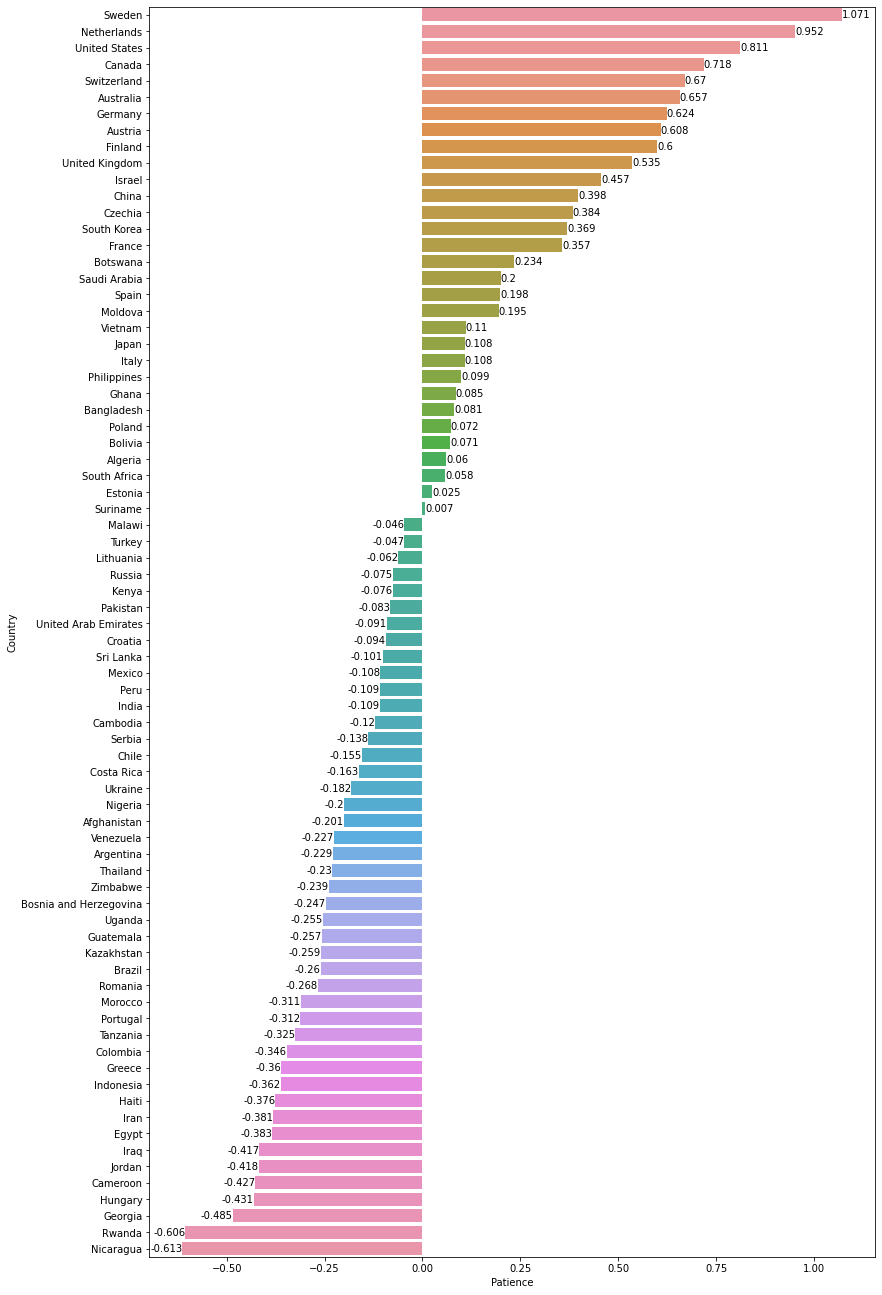

In [7]:
print(f'Most Patient Country: {data.index[0]} ({data.Patience[0]})\
     \nLeast Patient Country: {data.index[-1]} ({data.Patience[-1]})')
plt.figure(figsize=(13,23))
plot = sns.barplot(data.Patience, data.index)
plt.bar_label(plot.containers[0],size=10)
plt.show()

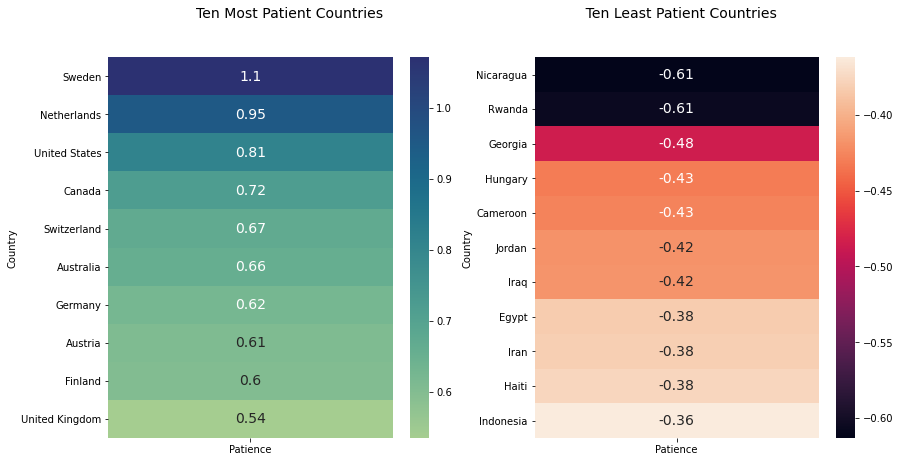

In [8]:
fig, ax = plt.subplots(1,2, figsize=(14,7))
plt.suptitle(f'Ten Most Patient Countries{" "*45}Ten Least Patient Countries', fontsize=14)
sns.heatmap(data.iloc[:10].drop('Code', axis=1), cmap='crest', 
            annot=True, annot_kws={'size': 14}, ax=ax[0])
sns.heatmap(data.iloc[-11:].drop('Code', axis=1).sort_values('Patience'), 
            annot=True, annot_kws={'size': 14}, ax=ax[1])
plt.show()

In [9]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [10]:
map_data = dict(type = 'choropleth', locations = data.index,
                locationmode = 'country names', z = data.Patience, text=data.Code, 
                colorscale= 'YlGnBu', marker = dict(line = dict(color='black',width=0.5)),
                colorbar = {'title':'Patience'})
layout = dict(title = 'Country-level Estimates of Patience: 2012',
              geo = dict(showframe = False, projection = {'type':'natural earth'}))
choromap = go.Figure(data=map_data, layout=layout)
iplot(choromap)

## Thank You!